# Customer Segmentation in Python

**Análise Cohort**


Análise de Cohort é uma importante ferramenta de avaliação do comportamento dos consumidores que permite avaliar o engajamento dos consumidores e monitorar a receita trazida por eles em cada período.

Podemos avaliar os resultados das mudanças de estratégia e desenvolver ações considerando diferentes experiências de compra.

Fonte: https://www.agendor.com.br/blog/analise-cohort/

Tipos de Cohort:

- Time cohorts: mostra o comportamento dos clientes dependendo do tempo que eles começaram a usar os produtos ou serviços da companhia. O tempo pode ser mensal, trimestral ou até diário.
 
- Beahvior cohorts: são os consumidores que adquiriram um produto ou assinaram um serviço no passado. Ele agrupa consumidores por tipo de produto ou serviço assinado. Consumidores que assinaram um pacote básico podem ter diferentes necessidades do que aqueles que assinaram serviços avançados. Entendendo os agrupamentos pode ajudar a empresa a fazer um serviço ou produto personalizado para segmentos particulares.
 
- Size cohorts: referente aos vários tamanhos de consumidores que compraram produtos ou serviços. Essa categorização pode ser baseada no quanto foi gasto em um período específico após a aquisição, ou no tipo de produto que o consumidor mais gastou em um período.



**1. Importando bibliotecas**

In [1]:
# Tratamento de dados
import pandas as pd
import datetime as dt
# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

**2. Carregando dados**

Dataset: https://archive.ics.uci.edu/ml/datasets/Online%20Retail

In [2]:
df0 = pd.read_excel('Online Retail.xlsx')
df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df0.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**3. Tratamento dos Dados**

A definição do cohort é o primeiro passo da análise. Vou fazer uma análise de cohort temporal utilizando como referência o mês da primeira transação realizada pelo consumidor.

Para isso preciso criar um dataset composto por linhas do mês da primeira transação e colunas com o tempo (meses corridos) da primeira aquisição.

In [5]:
# Função para extrair o mês do InvoiceDate setando o dia para 1
def get_month(x): return dt.datetime(x.year, x.month, 1) 

In [6]:
# Cria a coluna InvoiceMonth
df0['InvoiceMonth'] = df0['InvoiceDate'].apply(get_month) 

# Agrupa por CustomerID e seleciona o valor de InvoiceMonth
grouping = df0.groupby('CustomerID')['InvoiceMonth']

# Atribui o valor mínimo de InvoiceMonth para cada costumerID no dataset original
df0['CohortMonth'] = grouping.transform('min')

df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


Calcular o intervalo de cada transição para o primeiro mês de transição possibilita a criação de métrica para cada período de cohort em comparação ao longo do tempo.

In [7]:
def get_date_int(df, column):
    '''
    Função para extrair os números inteiros de dia, mês e ano
    '''
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [8]:
# Extrair os números inteiros das datas da coluna 'InvoiceMonth'
invoice_year, invoice_month, invoice_day = get_date_int(df0, 'InvoiceMonth')

# Extrair os números inteiros das datas da coluna 'CohortMonth'
cohort_year, cohort_month, cohort_day = get_date_int(df0, 'CohortMonth')

In [9]:
# Calcula a diferença em anos da data de invoice para a data de cohort
years_diff = invoice_year - cohort_year

# Calcula a diferença em meses da data de invoice para a data de cohort
months_diff = invoice_month - cohort_month

# Extrai a diferença em meses de todos os valores do dataset
# +1 é utilizado para que o primeiro mês seja 1 tornando a análise mais clara
df0['CohortIndexMonth'] = years_diff * 12 + months_diff + 1
df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndexMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


**4. Análise de Cohort**

**4.1 Taxa de Retenção**<br>
A primeira métrica de avaliação de cohort criada será de taxa de retenção que consiste na taxa de engajamento dos consumidores na aquisição de novos produtos ao longo dos meses.

In [10]:
grouping = df0.groupby(['CohortMonth', 'CohortIndexMonth'])

# Conta a quantidade de valores únicos de CustomerID por mês de cohort e índice de cohort (meses corridos)
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Cria um dataframe pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndexMonth', values='CustomerID')

# Seleciona a primeira coluna e armazena na variavel cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide a contagem de cohort pelos dados armazenados em cohort_sizes ao longo de cada mês (linha)
# Primeira coluna será sempre 1 porque é a nossa referência
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention

CohortIndexMonth,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotando uma matriz de heatmap com os valores de retenção

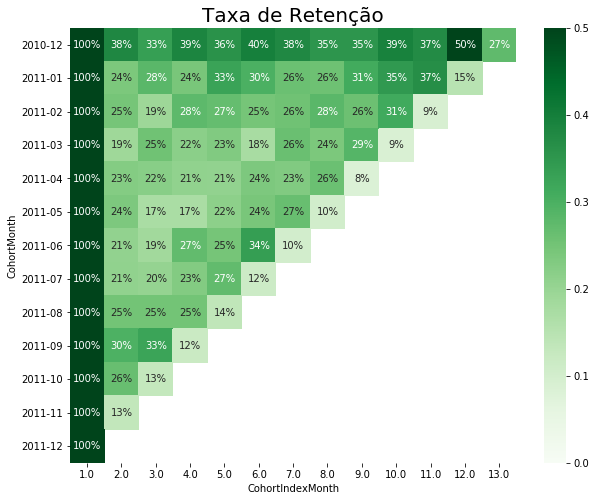

In [11]:
# Tamanho do gráfico
plt.figure(figsize=(10, 8))
# Título do gráfico
plt.title('Taxa de Retenção', size=20)
# Cria a matriz heatmap
ax = sns.heatmap(data = retention,
                 annot=True,
                 fmt = '.0%',
                 vmin = 0.0,
                 vmax = 0.5,
                 cmap='Greens')
# Formata os rótulos do eixo y
ax.set_yticklabels(retention.index.strftime('%Y-%m'))
# Mostra o gráfico
plt.show()

In [12]:
retention.iloc[0,1:].mean()

0.3742088607594937

- Os consumidores com maior taxa de retenção ao longo dos meses foram os do mês de dezembro/10, mantendo uma média de 37,4% de retenção nos 12 meses de análise.
- Consumidores entre os meses de 2011/03 a 2011/08 apresentaram baixa retenção.

**4.2 Ticket Médio**<br>
Permite avaliar se existe alguma diferença no padrão de compras ao longo do tempo e cohorts.

In [13]:
# Calcula o ticket médio por mês de cohort e índice de cohort (meses corridos)
cohort_data = grouping['UnitPrice'].mean()
cohort_data

CohortMonth  CohortIndexMonth
2010-12-01   1.0                 3.205109
             2.0                 3.183116
             3.0                 3.203559
             4.0                 3.587192
             5.0                 2.931327
                                   ...   
2011-10-01   2.0                 2.670060
             3.0                 2.607817
2011-11-01   1.0                 2.632911
             2.0                 2.319132
2011-12-01   1.0                 2.276426
Name: UnitPrice, Length: 91, dtype: float64

In [14]:
# Redefine os índices do agrupamento cohort_data
cohort_data = cohort_data.reset_index()

# Cria um dataframe pivot
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndexMonth', values='UnitPrice')

average_price.round(2)

CohortIndexMonth,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.21,3.18,3.20,3.59,2.93,4.97,3.18,3.22,3.50,3.03,3.30,2.83,2.76
2011-01-01,3.50,3.65,3.06,8.37,3.16,3.16,2.91,2.75,2.64,5.45,2.87,2.60,NaN
2011-02-01,3.34,4.45,4.80,3.15,2.99,2.79,2.81,3.21,2.89,2.94,3.22,NaN,NaN
2011-03-01,3.29,4.98,3.66,3.28,3.61,2.76,2.84,2.79,2.70,2.49,NaN,NaN,NaN
2011-04-01,3.42,3.96,3.31,2.68,3.02,2.86,2.89,2.80,2.61,NaN,NaN,NaN,NaN
2011-05-01,4.64,3.23,2.65,3.17,2.66,2.49,2.61,2.54,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.40,3.18,3.34,2.83,2.56,3.52,2.29,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.46,3.48,2.75,2.69,2.40,2.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.02,5.40,5.69,7.04,6.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


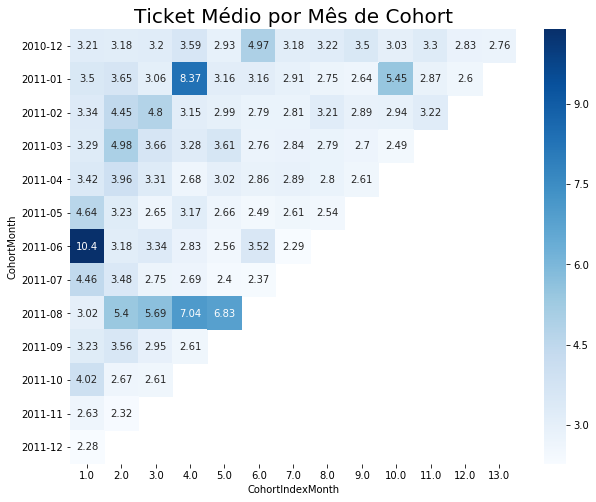

In [15]:
# Tamanho do gráfico
plt.figure(figsize=(10, 8))
# Título do gráfico
plt.title('Ticket Médio por Mês de Cohort', size=20)
# Cria a matriz heatmap
ax = sns.heatmap(data = average_price,
                 fmt = '.3g',
                 annot=True,
                 cmap='Blues')
# Formata os rótulos do eixo y
ax.set_yticklabels(average_price.index.strftime('%Y-%m'))
# Mostra o gráfico
plt.show()

# Recency, Frequency, Monetary Value analysis

In [16]:
print(f"Min:{df0['InvoiceDate'].min()}; Max: {df0['InvoiceDate'].max()}")

Min:2010-12-01 08:26:00; Max: 2011-12-09 12:50:00


In [17]:
df1 = df0[ df0['InvoiceDate'] >= '2010-12-10']

In [18]:
print(f"Min:{min(df1['InvoiceDate'])}; Max: {max(df1['InvoiceDate'])}")

Min:2010-12-10 09:33:00; Max: 2011-12-09 12:50:00


In [19]:
snapshot_date = max(df1['InvoiceDate']) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [20]:
df1['TotalSum'] = df1['UnitPrice'] * df1['Quantity']

C:\Users\edubr\Anaconda3\envs\data-science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
# Calculate Recency, Frequency and Monetary value for each customer 
datamart = df1.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(datamart.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          2           0.00
12347.0           2        151        3598.21
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40


In [22]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=4, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=4, labels=f_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

# Create labels for MonetaryValue
m_labels = range(1, 5)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(datamart['MonetaryValue'], q=4, labels=m_labels)

# Create new column M
datamart = datamart.assign(M=m_groups.values)

In [23]:
# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,3.0,111
12347.0,2,151,3598.21,4,4,4,12.0,444
12348.0,75,31,1797.24,2,2,4,8.0,224
12349.0,19,73,1757.55,3,3,4,10.0,334
12350.0,310,17,334.40,1,1,2,4.0,112


**Análises da tabela RFM:**<br>
- Ver as 10 combinações de RFM mais frequentes e 10 menos frequentes. É sempre interessante comparar os seguimentos antes de outras aplicações de negócios
- Fazer uma simples seleção de consumidores baseados em seu RFM. Ex: Os 5 últimos consumidores com o RFM 111
- Sumarizar algumas métricas por cada RFM score

In [24]:
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         247.5       7.9         106.3   389
4.0         163.3      13.9         221.3   376
5.0         146.7      20.8         349.7   503
6.0          86.8      28.1         483.7   460
7.0          80.2      39.2         724.8   438
8.0          57.4      54.8         954.0   464
9.0          44.0      77.2        1354.6   403
10.0         30.1     113.4        1795.7   443
11.0         19.8     190.6        3942.3   358
12.0          6.7     364.0        8570.6   462

Os valores de RFM são melhores a cada segmento de RFM score alto.

Mesmo assim pode ser difícil intuitivamente ter uma completa interpretação dos segmentos. Podemos agrupar os consumidores baseado no RFM scores em um número de segmentos menor ainda.


In [25]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

datamart.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            206.1      10.8         162.8   765
Gold               24.7     190.7        4029.0  1666
Silver             94.1      35.4         621.2  1865

Na realidade isso pode levar várias tentativas e erros para encontrar as linhas de corte corretas. Podemos utilizar o k-means ao invés de atribuir arbitrariamente os limites.

**Data pre-processing for clustering**

Utilizarei o algoritmo k-means para clusterizar os grupos de consumidores conforme seus valores RFM.

Algumas premissão do método k-means são:<br>
- Todas as variáveis terem o mesmo peso, com isso devem possuir média e variância bem próximas.
- Todas as variáveis devem possir uma distribuição simétrica.

Identificando distribuição assimétrica:
- Visualizar a distribuição dos dados através de histograma.
- Se tem uma calda, é assimétrica.

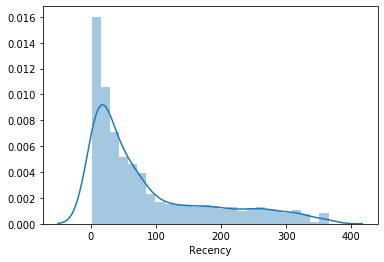

In [26]:
# Visualizando a coluna Recency
sns.distplot(datamart['Recency'])
plt.show()

A distribuição possui uma curva à direita então podemos afirmar que ela é assimétrica.

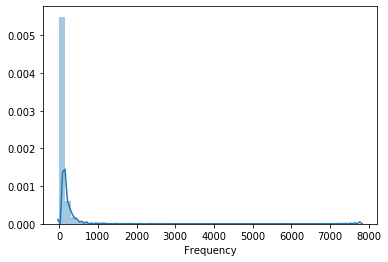

In [27]:
# Visualizando a coluna Recency
sns.distplot(datamart['Frequency'])
plt.show()

A coluna Frequency possui uma assimetria ainda maior. A calda está novamente no lado direito porém a maioria das observações estão entre 0 e 1.000 enquanto existem valores expalhados até 8.000.

Transformação nos dados para lidar com o assimetrica

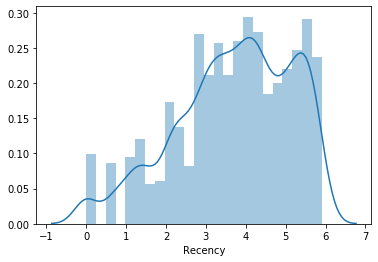

In [28]:
# Aplicando a transformação logaritmica
import numpy as np
recency_log = np.log(datamart['Recency'])
sns.distplot(recency_log)
plt.show()

Como pode-se observar, a distribuição não está perfeitamente simétrica, porém possui muito menos assimetria comparada com a distribuição original.

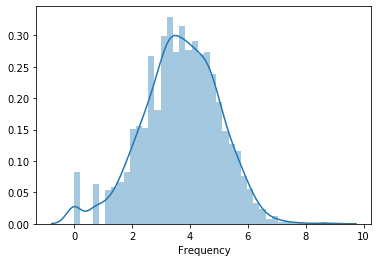

In [29]:
frequency_log = np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.show()

O mesmo acontece na coluna Frequency.

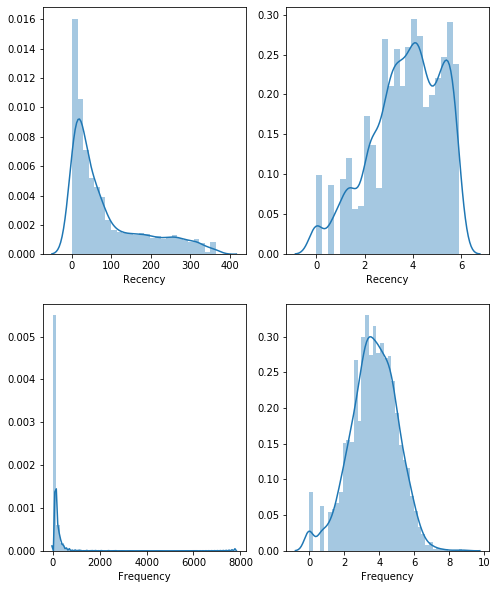

In [30]:
# Visualizando as distribuições lado a lado
plt.subplots(figsize=(8,10))

plt.subplot(2,2,1)
sns.distplot(datamart['Recency'])
plt.subplot(2,2,2)
sns.distplot(recency_log)

plt.subplot(2,2,3)
sns.distplot(datamart['Frequency'])
plt.subplot(2,2,4)
sns.distplot(frequency_log)

plt.show()

Normalizando os Dados para terem a mesma média e o mesmo desvio padrão

In [31]:
datamart_RFM = datamart[['Recency', 'Frequency', 'MonetaryValue']]
datamart_RFM.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,151,3598.21
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [32]:
data_centered = datamart_RFM - datamart_RFM.mean()
data_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4296.00,4296.00,4296.00
mean,-0.00,-0.00,-0.00
std,94.57,227.64,7995.36
min,-86.13,-90.25,-6148.77
25%,-70.13,-74.25,-1571.02
50%,-40.13,-50.25,-1217.20
75%,46.87,7.75,-275.67
max,277.87,7701.75,277627.88


Nota-se que a média de cada variável é aproximadamente zero.

In [33]:
data_variation = datamart_RFM / datamart_RFM.std()
data_variation.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4296.00,4296.00,4296.00
mean,0.92,0.40,0.23
std,1.00,1.00,1.00
min,0.01,0.00,-0.54
25%,0.18,0.07,0.04
50%,0.50,0.18,0.08
75%,1.42,0.43,0.20
max,3.86,34.23,34.96


Nota-se que o desvio padrão de cada variável é aproximadamente 1.

In [34]:
# Utilizando as 2 técnicas para centralizar os dados em torna da média e escalar os dados em desvio padrão.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_RFM)
datamart_normalized = scaler.transform(datamart_RFM)

datamart_normalized = pd.DataFrame(datamart_normalized, index=datamart_RFM.index, columns=datamart_RFM.columns)
datamart_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4296.00,4296.00,4296.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.91,-0.40,-0.77
25%,-0.74,-0.33,-0.20
50%,-0.42,-0.22,-0.15
75%,0.50,0.03,-0.03
max,2.94,33.84,34.73


**Pre-processing pipeline**

A sequência das etapas de pré-processamento importam. Premissas:

- Transformação logaritmica só funciona com dados positivos
- Normalização força os dados a terem valores negativos e o log não funcionará

Sequência:
1. Deixar os dados em simetria - aplicar transformação logaritma
2. Padronizar os dados para a mesma média de valores
3. Escalar para o mesmo desvio padrão
4. Armazenar os dados em um array separado para ser clusterizado

**Customer Segmentation with K-means**

Etapas:
- Pré processamento dos dados
- Escolher a quantidade de clusters
- Rodar o algoritmo k-means nos dados pré-processados
- Analisar o valor de RFM médio de cada cluster e compará-los

Métodos para definir a quantidade de clusters:
- Métodos visuais como o elbow criterion (cotovelo) que é fácil de interpretar e nos da uma boa estimativa.
- Métodos matemáticos como o coeficiente silhouette que é útil quando tentamos encontrar um modelo com melhor definição de clusters.
- Experimentação e interpretação

In [35]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [36]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_RFM.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           4.8    2679.4      109929.7    13
1          38.8     102.0        1888.5  3214
2         233.5      27.4         464.8  1069

**Definindo a quantidade de clusters**

Elbow criterion method
- Plota a soma dos erros quadráticos para cada número de clusters. Nesse caso, o erro é a soma das distâncias quadráticas de cada ponto ao centróide do cluster.
- Identifica o "cotovelo" no gráfico, ou seja, onde o SSE (sum of squared error) diminui e se torna constante parecendo um cotovelo mostrando que não há ganho aumentando a quantidade de clusters.
- Esse ponto representa a quantidade ótima de clusters pela perspectiva de SSE. No entando, deve-se escolher várias opções em torno do cotovelo e testar para ver qual faz mais sentido.

In [37]:
# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

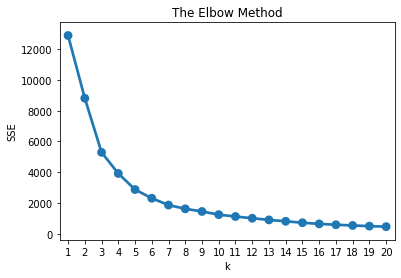

In [38]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [39]:
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']
datamart_normalized.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,2.526100,-0.392123,-0.232804,2
12347.0,-0.900309,0.262487,0.217285,1
12348.0,-0.128310,-0.264716,-0.007993,1
12349.0,-0.720528,-0.080195,-0.012957,1
12350.0,2.356894,-0.326223,-0.190975,2


Análise dos Clusters

In [40]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                       id_vars=['CustomerID', 'Cluster'],
                       value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                       var_name='Attribute',
                       value_name='Value')
datamart_melt.head()

,CustomerID,Cluster,Attribute,Value
0,12346.0,2,Recency,2.526100
1,12347.0,1,Recency,-0.900309
2,12348.0,1,Recency,-0.128310
3,12349.0,1,Recency,-0.720528
4,12350.0,2,Recency,2.356894


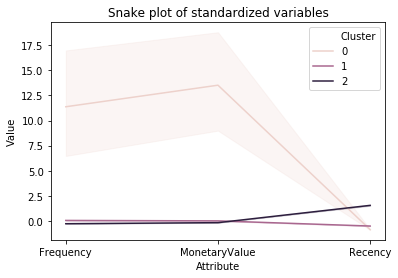

In [41]:
# Snake plot
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=datamart_melt)

Relative importance of segment attributes

In [42]:
# Cálculo da média dos valores absolutos por cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()

# Cálculo da média da população
population_avg = datamart_RFM.mean()

# Cálculo dos valores relativos de cada cluster em relação à média da população nos 3 atributos
relative_imp = cluster_avg / population_avg - 1

relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.94,28.36,58.07
1,-0.56,0.12,0.01
2,1.68,-0.70,-0.75


Para uma melhor visualização, a tabela será transformada em uma matriz de calor

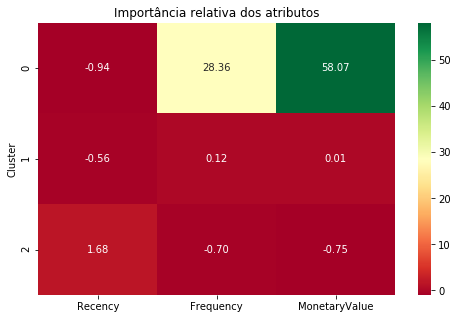

In [43]:
plt.figure(figsize=(8,5))
plt.title('Importância relativa dos atributos')
sns.heatmap(data = relative_imp,
           annot = True,
           fmt = '.2f',
           cmap = 'RdYlGn')